In [6]:
import torch
class BinaryClassification(torch.nn.Module): ## didnt work to expectation
    def __init__(self):
        super().__init__()
        self.layer_1=torch.nn.Linear(in_features=2,out_features=5)
        self.layer_2=torch.nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return (self.layer_2(self.layer_1(x)))


In [3]:
model=torch.nn.Sequential(torch.nn.Linear(in_features=2,out_features=10),torch.nn.ReLU(),torch.nn.Linear(in_features=10,out_features=1))

In [4]:
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

In [6]:
model=BinaryClassification()

In [7]:
x_train.dtype

torch.float32

In [8]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [9]:
for i in range(10000):
    model.train()
    y_logits=model.forward(x_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits,y_train) ##BCEwithlogits thats why we pass logits
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [10]:
from sklearn.metrics import accuracy_score
y_logits=model.forward(x_test)
y_test_pred=torch.round(torch.sigmoid(y_logits))
with torch.inference_mode():
    print(accuracy_score(y_pred=y_pred,y_true=y_train))
    print(accuracy_score(y_pred=y_test_pred,y_true=y_test))

0.5125
0.45


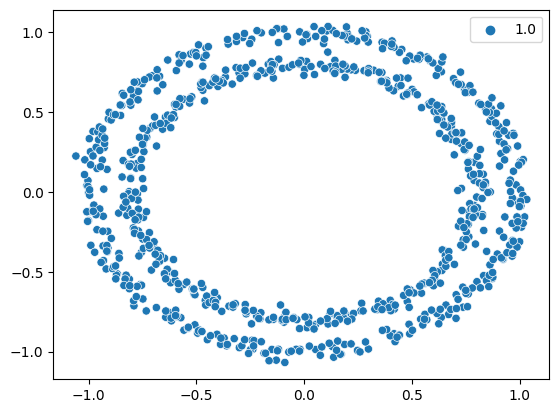

In [11]:
import seaborn as sns
with torch.inference_mode():
    # sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
    sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_pred)
    sns.scatterplot

## A multiclass problem

In [11]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data=datasets.MNIST(root='data',train=True,transform=ToTensor(),download=True)
test_data=datasets.MNIST(root='data',train=False,transform=ToTensor(),download=True)

In [13]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [14]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [12]:
from torch.utils.data import DataLoader
loaders={
    "train":DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    "test":DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)
}

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

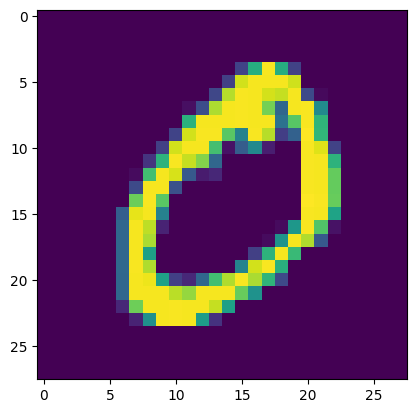

In [13]:
import matplotlib.pyplot as plt
image=train_data.data[1]
plt.imshow(image)
train_data.class_to_idx

In [14]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [15]:
train_data_batch,train_data_labels=next(iter(loaders["train"]))

In [16]:
flatten_model=nn.Flatten()
out=flatten_model(train_data_batch[0])

In [20]:
out.shape

torch.Size([1, 784])

In [17]:
class MNIST(nn.Module):
    def __init__(self,input_shape:int,hidden_shape:int,output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_shape),
            nn.ReLU(),
            nn.Linear(in_features=hidden_shape,out_features=output_shape ),
        )
    def forward(self,x):
        return self.layer_stack(x)

In [18]:
model0=MNIST(input_shape=784,hidden_shape=10,output_shape=10)

In [19]:
model0(torch.rand([1,28,28])).shape # Its working properly

torch.Size([1, 10])

In [22]:
Loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(params=model0.parameters(),lr=0.1)

In [23]:
train_data_batch.shape

torch.Size([100, 1, 28, 28])

In [24]:
import time
def test_fn(model,optimizer,loss_fn,epochs:int,loaders):

    for i in range(epochs):
        train_loss=0
        for Batch,(x,y) in enumerate(loaders["train"]):
            model.train()
            y_pred=model(x)
            loss=loss_fn(y_pred,y)
            optimizer.zero_grad()
            train_loss+=loss
            loss.backward()
            optimizer.step()
        train_loss=loss/len(loaders["train"])
        print(f"Loss rate for epoch {i}: {train_loss}")
start=time.time()
test_fn(model=model0,optimizer=optimizer,loss_fn=Loss,epochs=5,loaders=loaders)
end=time.time()

Loss rate for epoch 0: 0.0004800689348485321
Loss rate for epoch 1: 0.0005002117250114679
Loss rate for epoch 2: 0.0005142653244547546
Loss rate for epoch 3: 0.0005319076008163393
Loss rate for epoch 4: 0.00032288345391862094


In [26]:
from sklearn.metrics import accuracy_score
model0.eval()
with torch.inference_mode():
    test_acc=0
    for X_test,Y_test in loaders["test"]:
        y_pred=model0.forward(X_test).argmax(dim=1)
        test_acc+=accuracy_score(y_true=Y_test,y_pred=y_pred)

    test_acc=test_acc/len(loaders["test"])


<generator object Module.named_modules at 0x7cd440e0f6f0>

In [27]:
import pandas as pd
Data=pd.DataFrame(data={"Model":["model0"],
                        "Time_taken":[end-start],"Accuracy":[test_acc]})


In [28]:
class CNN_Model(nn.Module): ##best model found
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
          super().__init__()
          self.block_1 = nn.Sequential(
              nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2,
                          stride=2)
          )
          self.block_2 = nn.Sequential(
              nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
              nn.ReLU(),
              nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2)
          )
          self.classifier = nn.Sequential(
              nn.Flatten(),

              nn.Linear(in_features=hidden_units*14*14,
                        out_features=output_shape),
              )
  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    # x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)

    return x



In [29]:
model1=CNN_Model(input_shape=1,output_shape=10,hidden_units=10)

In [30]:
image_batch=torch.randn([100,1,28,28])
image_test=image_batch[0]


In [31]:
model1(image_test.unsqueeze(0)) ## to check dimension

tensor([[ 0.3082,  0.1383, -0.3591,  0.5883,  0.4864,  0.6715, -0.1543, -0.6367,
         -0.0159,  0.2305]], grad_fn=<AddmmBackward0>)

In [33]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(params=model1.parameters(),lr=0.001)

In [35]:

start=time.time()
test_fn(model1,optimizer,loss_fn,5,loaders)
end=time.time()

Loss rate for epoch 0: 0.000524077273439616
Loss rate for epoch 1: 0.0004810960672330111
Loss rate for epoch 2: 0.0001025244637276046
Loss rate for epoch 3: 8.716253068996593e-05
Loss rate for epoch 4: 0.00031002218020148575


In [39]:
model1.eval()
test_acc=0
with torch.inference_mode():
  for X_test,Y_test in loaders["test"]:

        y_pred=model1(X_test).argmax(dim=1)

        t=accuracy_score(y_true=Y_test,y_pred=y_pred)
        test_acc+=t

In [40]:
test_acc=test_acc/len(loaders["test"])
test_acc

0.9706999999999991

In [188]:
end-start

33.19393444061279

In [41]:
Data=pd.concat([Data,pd.DataFrame(data={"Model":["model1"],
                               "Time_taken":[end-start],"Accuracy":[test_acc]})],ignore_index=True)

In [42]:
Data


,Model,Time_taken,Accuracy
0,model0,37.342796,0.9229
1,model1,57.965079,0.9707


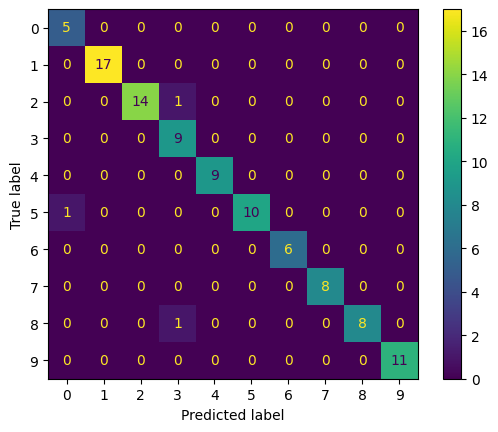

In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
model1.eval() #matrix for a batch

with torch.inference_mode():
    for X_test,Y_test in loaders["test"]:

        y_pred=model1(X_test).argmax(dim=1)
        confusion_mat=confusion_matrix(y_pred=y_pred,y_true=Y_test)
        disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
        break
    disp.plot()